In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
  df.shape

(200, 2)

In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


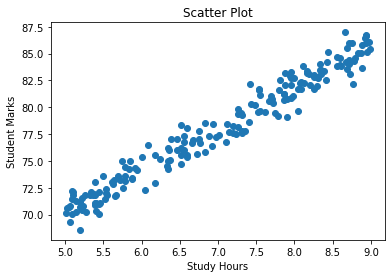

In [8]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter Plot")
plt.show()

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [19]:
#Null value is present, removing it. so filling with mean value
df1=df.fillna(df.mean())

In [20]:
df1.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [28]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,[-1]]

In [29]:
x.shape, y.shape

((200, 1), (200, 1))

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

1.0443968573561397


In [38]:
#Tuning the model

reg.score(x_test,y_test)

0.9521841793508594

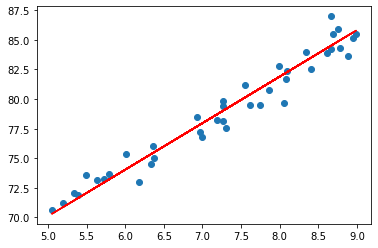

In [41]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color='r')


In [42]:
import joblib
joblib.dump(reg, 'student_mark_predictor.pkl')

['student_mark_predictor.pkl']